<a href="https://colab.research.google.com/github/MutwiriFrank/US_accident_Exploratory_data_analysis/blob/Master/US_accidents_explaratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#     US Acidents Exploratory Data Analysis

In [ ]:
!pip install opendatasets --upgrade --quiet
try:
  from kiteconnect import KiteConnect
except ImportError:
  !pip install kiteconnect
  from kiteconnect import KiteConnect

## Download Data


In [ ]:
import opendatasets as od

#  {"username":"frankinmutwiri","key":"f36711ef81e152c8b58e6f0a220c9fcc"}
download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents' 

od.download(download_url)

In [ ]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning

- Load files using pandas
- look at some information about data and columns
- Fix any missing or incorrect data

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import seaborn as sns

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23000,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.74700,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.05500,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.12300,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17239,-84.49279,39.17048,-84.50180,0.50000,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.54300,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.33800,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.56100,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.77200,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.shape

(2845342, 47)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2845342.00000,2845342.00000,2845342.00000,2845342.00000,2845342.00000,2845342.00000,1101431.00000,2776068.00000,2375699.00000,2772250.00000,2786142.00000,2774796.00000,2687398.00000,2295884.00000
mean,2.13757,36.24520,-97.11463,36.24532,-97.11439,0.70268,8089.40811,61.79356,59.65823,64.36545,29.47234,9.09939,7.39504,0.00702
std,0.47872,5.36380,18.31782,5.36387,18.31763,1.56036,18360.09399,18.62263,21.16097,22.87457,1.04529,2.71755,5.52745,0.09349
min,1.00000,24.56603,-124.54807,24.56601,-124.54575,0.00000,0.00000,-89.00000,-89.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,33.44517,-118.03311,33.44628,-118.03333,0.05200,1270.00000,50.00000,46.00000,48.00000,29.31000,10.00000,3.50000,0.00000
50%,2.00000,36.09861,-92.41808,36.09799,-92.41772,0.24400,4007.00000,64.00000,63.00000,67.00000,29.82000,10.00000,7.00000,0.00000
75%,2.00000,40.16024,-80.37243,40.16105,-80.37338,0.76400,9567.00000,76.00000,76.00000,83.00000,30.01000,10.00000,10.00000,0.00000
max,4.00000,49.00058,-67.11317,49.07500,-67.10924,155.18600,9999997.00000,196.00000,196.00000,100.00000,58.90000,140.00000,1087.00000,24.00000


In [ ]:
# Identify numeric datatypes


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

#### Find the percentage of missing values and remove the colomns with more than 50% of missing values

In [ ]:
sum_missing_values = df.isna().sum().sort_values(ascending=False)  # show sum of missing values per column

In [ ]:
percentage_missing_values = sum_missing_values / len(df)
percentage_missing_values = percentage_missing_values[percentage_missing_values > 0]
percentage_missing_values

Number                  0.61290
Precipitation(in)       0.19311
Wind_Chill(F)           0.16506
Wind_Speed(mph)         0.05551
Wind_Direction          0.02593
Humidity(%)             0.02569
Weather_Condition       0.02483
Visibility(mi)          0.02479
Temperature(F)          0.02435
Pressure(in)            0.02081
Weather_Timestamp       0.01783
Airport_Code            0.00336
Timezone                0.00129
Nautical_Twilight       0.00101
Civil_Twilight          0.00101
Sunrise_Sunset          0.00101
Astronomical_Twilight   0.00101
Zipcode                 0.00046
City                    0.00005
Street                  0.00000
dtype: float64

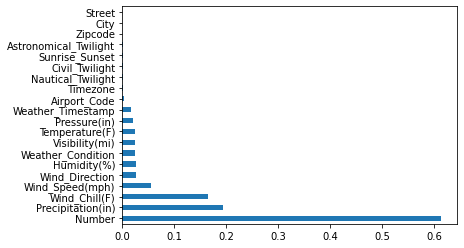

In [ ]:
#  A panda dF with one column is a pandas series i.e It can be plotted
percentage_missing_values.plot(kind='barh')



## Exploratory analysis and visualisation


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(df.City.unique())

11682

In [ ]:
#  Calculate how many time accidents have occured in a city
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [ ]:
# SEARCH FOR INDIVIVIDUAL VALUE IN COLUMN
'New York' in df.City.unique()


True

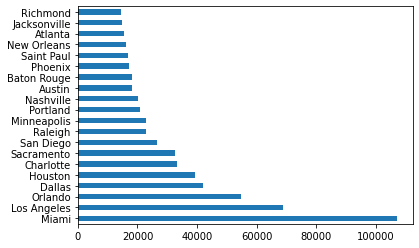

In [ ]:
cities_by_accident[:20].plot(kind='barh')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


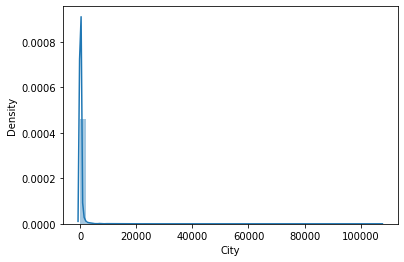

In [ ]:
sns.distplot(cities_by_accident)

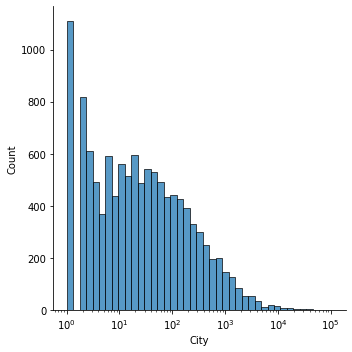

In [ ]:
sns.displot(data=cities_by_accident,  log_scale=True  )

In [ ]:
low_accident_cities = cities_by_accident[cities_by_accident < 100  ]
len(low_accident_cities) /  len(df.City.unique())

0.7470467385721623

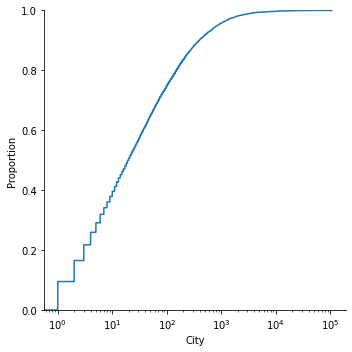

In [ ]:
sns.displot(data=cities_by_accident,  log_scale=True, kind="ecdf"  )

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000 ]
len(high_accident_cities) / len(df.City.unique())

0.04245848313644924

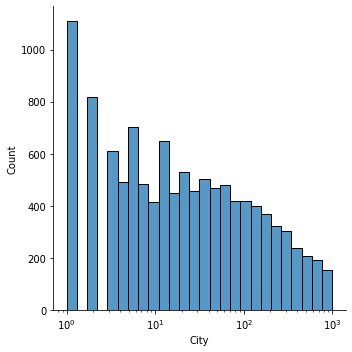

In [ ]:
low_accident_cities = cities_by_accident[cities_by_accident < 1000  ]

sns.displot(data=low_accident_cities,  log_scale=True )


### Time



In [ ]:
# Convertime dates and time from string to Timestamp and overwrite the current column dtype
df.Start_Time = pd.to_datetime(df.Start_Time)
df['Start_Time'].dtype


dtype('<M8[ns]')

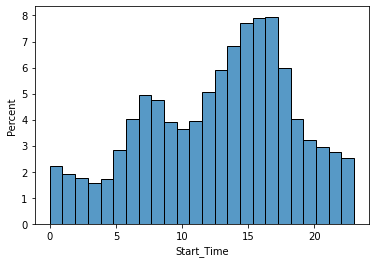

In [ ]:
# sns.histplot(df.Start_Time.dt.hour, bins=24 , stat="percent" ) # All days

weekday_accidents = df.Start_Time[df.Start_Time.dt.dayofweek < 6 ]

sns.histplot(weekday_accidents.dt.hour, bins=24 , stat="percent" )


# stat="percent" converts histogram y axis to percentage instead of actual values. ex 2.4% of accidents ocour at 12am

- There are more accidentd during the day than during the night
- During the day there is are more accidents (LArgest peak) between 1pm and 6pm, with 3pm,4pm and 5pm recording the highest number of accident
- Has a smaller peak between 6pm and 8pm
- Has a bi modal distribution
 


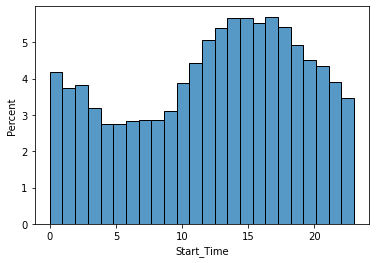

In [ ]:
weekend_accidents = df.Start_Time[df.Start_Time.dt.dayofweek > 5 ]
  
sns.histplot(weekend_accidents.dt.hour,  stat="percent", bins=24)
 


- There are more accidentd during the day than during the night
- During the day there is are more accidents (LArgest peak) between 12pm and 7pm, 


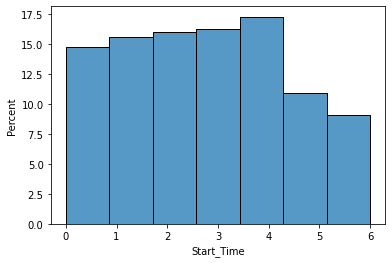

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, stat="percent", bins=7)

- There are more accidents on weekdays than weekends
- Rate of accidents increase from monday to friday and falls on saturday

#### By Month

In [ ]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

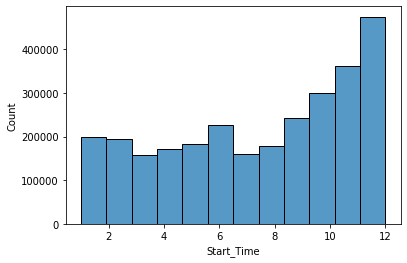

In [ ]:
sns.histplot(df.Start_Time.dt.month, stat="count", bins=12)

In [ ]:

df['Start_Time'].dt.year.unique()


array([2016, 2017, 2021, 2020, 2018, 2019])

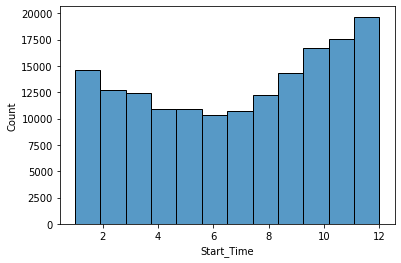

In [ ]:
accidents_2018 = df.Start_Time[df.Start_Time.dt.year == 2018 ]
  
sns.histplot(accidents_2018.dt.month,  bins=12)

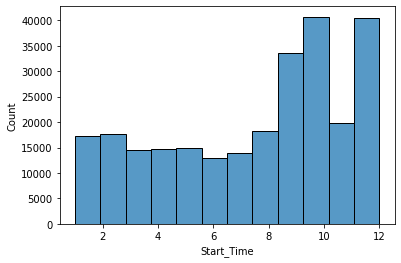

In [ ]:
accidents_2019 = df.Start_Time[df.Start_Time.dt.year == 2019 ]

sns.histplot(accidents_2019.dt.month,  bins=12)


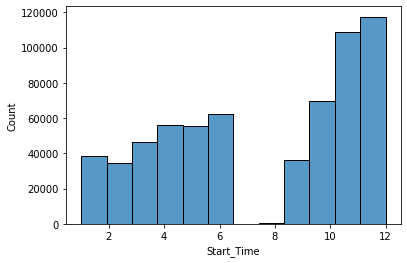

In [ ]:
accidents_2020 = df.Start_Time[df.Start_Time.dt.year == 2020 ]


sns.histplot(accidents_2020.dt.month,  bins=12)


In [ ]:
july = accidents_2020[accidents_2020.dt.month == 7 ]

len(july)

186

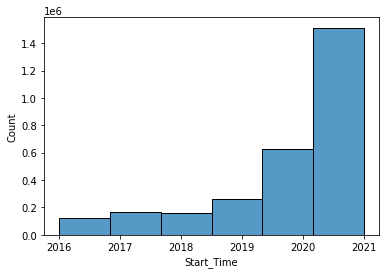

In [ ]:
accidents_2017 = df.Start_Time[df.Start_Time.dt.year == 2017 ]
accidents_2021 = df.Start_Time[df.Start_Time.dt.year == 2021 ]

count_2017 = len(accidents_2017 )
count_2018 = len(accidents_2018 )
decrease = ((count_2017 - count_2018) /count_2017) * 100
decrease = round(decrease, 3)

count_2019 =len(accidents_2019 )
increase_2019 = ((count_2019 - count_2018) /count_2018) * 100
increase_2019 = round(increase_2019, 3)

count_2020 = len(accidents_2020 )
increase_2020 = ((count_2020 - count_2019) /count_2019) * 100
increase_2020 = round(increase_2020, 3)

count_2021 = len(accidents_2021 )
increase_2021 = ((count_2021 - count_2020) /count_2020) * 100
increase_2021 = round(increase_2021, 3)


increase_2017_2021 = ((count_2021 - count_2017) /count_2020) * 100



increase2 = ((count_2020 - count_2019)/count_2019) * 100

print( f" There were {count_2017} accidents in 2017  ")

print( f" There were {count_2018} accidents in 2018 and {count_2017} accidents in 2017, an decrease of {decrease} percent  ")

print( f" There were {count_2019} accidents in 2019 and {count_2018} accidents in 2018, an increace of {increase_2019 } percent ")

print( f" There were {count_2020} accidents in 2020 and {count_2019} accidents in 2019, an increace of {increase_2020 } percent ")

print( f" There were {count_2021} accidents in 2021 and {count_2020} accidents in 2020, an increace of {increase_2021 } percent ")

print( f" There overall increase in accidenty from 2017 -  {count_2017} to 2020 - {count_2020}is {increase_2017_2021 } percent ")



 There were 163918 accidents in 2017  
 There were 163176 accidents in 2018 and 163918 accidents in 2017, an decrease of 0.453 percent  
 There were 258615 accidents in 2019 and 163176 accidents in 2018, an increace of 58.488 percent 
 There were 625864 accidents in 2020 and 258615 accidents in 2019, an increace of 142.006 percent 
 There were 1511745 accidents in 2021 and 625864 accidents in 2020, an increace of 141.545 percent 
 There overall increase in accidenty from 2017 -  163918 to 2020 - 625864is 215.3546137819079 percent 


## Insights
#### Cities
- Less then 4.2% of the cities have less more than 1000 accidents for the given period
- 74.7% of the cities have less than 100 accidents for the given *period*
- Over 1200 cities have reported just one acident
- The number of accidents per city decreases exponetially
#### Time
- There are more accidents during the day than night due to higher traffic
- During the day there is a spike at 7am,8am, 9am and 


# Questions
- Is there a relationship between accidents and temperature
- relationship between states and accidents(do some states have more accidents than others), How about per capita 
- Do seasons affect acciddents
- Weather condition -snow, rain, do precipitation affect accidents, wind
##### DateTIme
- Is there a relationship between time of the day and accidents - satart time
- Do weekends and weekdays have same ratio of accidents
-Have accidents increased over the years or reduced
-  o some months have more accidents



- Are some areas have a longer accident time than others
- Which strrets have the highest o of accidents
- side of street, right or left
- city, state, county
-  Visibility
- plot boxplt
- ho skewed is fdata,
- do 10% of cities contain 90% of accidents
- Why does new york have high population and less accidents
- corelation between month and accident
